In [134]:
import pandas as pd
import os
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(".."))
from pathlib import Path
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt 
from pivottablejs import pivot_ui
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [135]:
pd.set_option('display.max_columns', None) # or other number has no effect
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
data_path = '../data/pred/data.csv'

In [137]:
data = pd.read_csv(data_path)

In [138]:
def plot_actual_vs_predicted(df, county, category_name):
    # Ensure date_week is in datetime format
    df["date_week"] = pd.to_datetime(df["date_week"])

    # Filter by county and category
    df_filtered = df[(df["county"] == county) & (df["category_name"] == category_name)]

    # Split actual and predicted data
    df_actual = df_filtered[df_filtered["is_predict"] == False]
    print(df_actual.head(3))
    df_predicted = df_filtered[df_filtered["is_predict"] == True]
    print(df_predicted.head(3))

    # Plot actual vs. predicted sales
    plt.figure(figsize=(12, 6))
    plt.plot(df_actual["date_week"], df_actual["bottles_sold"], marker='o', label="Actual Sales")
    plt.plot(df_predicted["date_week"], df_predicted["bottles_sold"], marker='o', linestyle="dashed", label="Predicted Sales")

    # Formatting
    plt.xlabel("Date")
    plt.ylabel("Bottles Sold")
    plt.ylim(bottom=0)
    plt.title(f"Actual vs Predicted Sales for {category_name} in {county}")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

      date_week county category_name  bottles_sold  is_predict
1716 2024-01-07   POLK         VODKA         332.0       False
1717 2024-01-14   POLK         VODKA         468.0       False
1718 2024-01-21   POLK         VODKA         373.0       False
      date_week county category_name  bottles_sold  is_predict
2580 2025-01-05   POLK         VODKA    394.374329        True
2581 2025-01-12   POLK         VODKA    402.223999        True
2582 2025-01-19   POLK         VODKA    353.244019        True


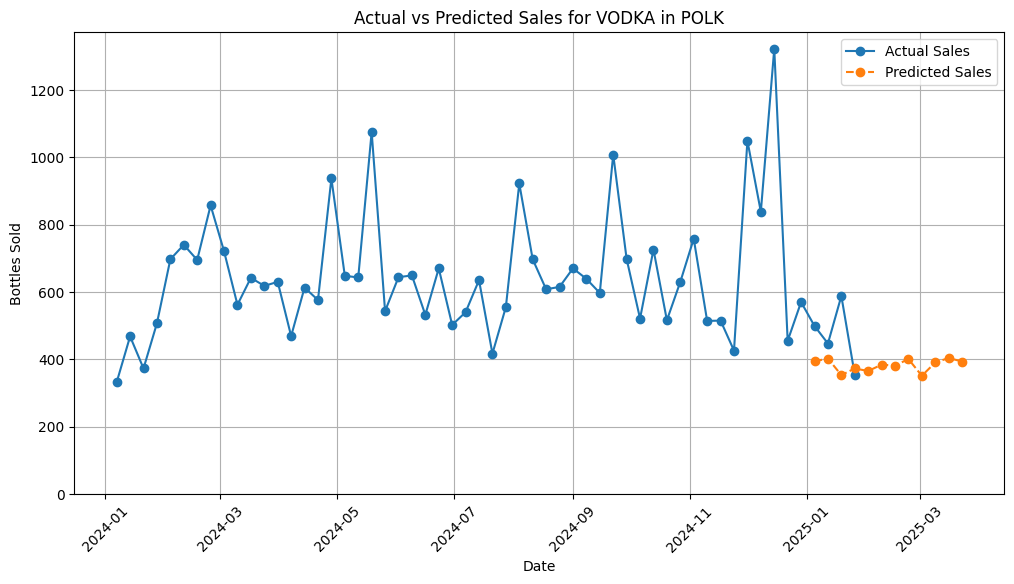

In [139]:
plot_actual_vs_predicted(data, 'POLK', 'VODKA')

      date_week county category_name  bottles_sold  is_predict
1612 2024-01-07   POLK           RUM        1152.0       False
1613 2024-01-14   POLK           RUM        1335.0       False
1614 2024-01-21   POLK           RUM        1142.0       False
      date_week county category_name  bottles_sold  is_predict
2556 2025-01-05   POLK           RUM     394.70694        True
2557 2025-01-12   POLK           RUM     402.56189        True
2558 2025-01-19   POLK           RUM     353.54010        True


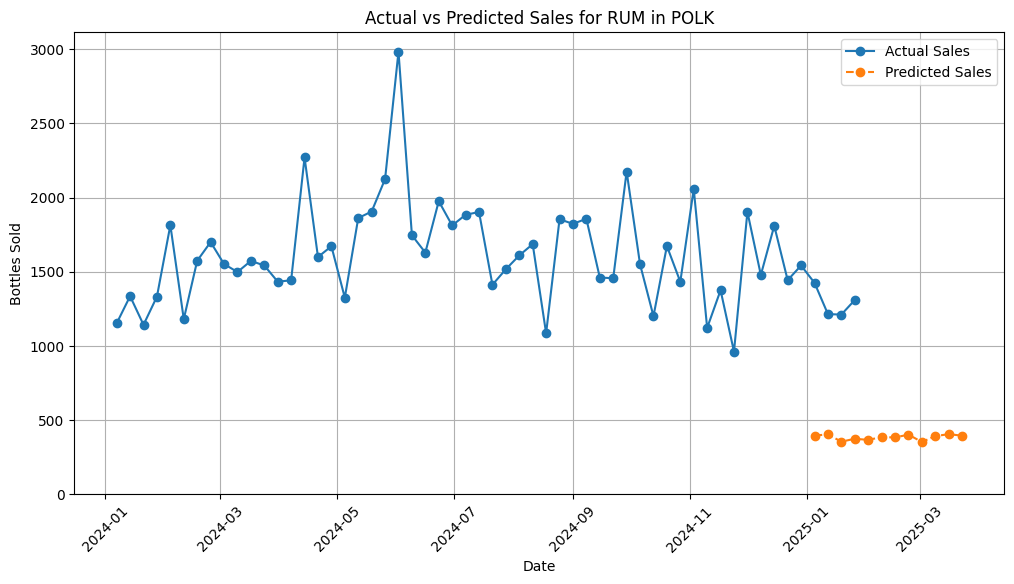

In [140]:
plot_actual_vs_predicted(data, 'POLK', 'RUM')

datetime.date(2014, 12, 4)

In [129]:
data_proc_path = '../data/processed/data_processed.csv'
data_proc = pd.read_csv(data_proc_path)

In [133]:
data_proc.head()

,cat_preproc__county_BLACK_HAWK,cat_preproc__county_JOHNSON,cat_preproc__county_LINN,cat_preproc__county_OTHER,cat_preproc__county_POLK,cat_preproc__county_SCOTT,cat_preproc__category_name_GIN,cat_preproc__category_name_LIQUEURS,cat_preproc__category_name_OTROS,cat_preproc__category_name_RUM,cat_preproc__category_name_TEQUILA_MEZCAL,cat_preproc__category_name_VODKA,cat_preproc__category_name_WHISKY,num_preproc__week_year,num_preproc__week_of_year,num_preproc__bottles_sold,remainder__date_week,remainder__sin_MoSold,remainder__cos_MoSold,category_name,county,sin_MoSold,cos_MoSold,bottles_sold
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.166667,0.962963,-0.299712,2012-12-30,-2.449294e-16,1.000000,GIN,BLACK HAWK,-2.449294e-16,1.000000,12
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.962963,-0.302594,2013-01-06,5.000000e-01,0.866025,GIN,BLACK HAWK,5.000000e-01,0.866025,11
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.925926,-0.236311,2013-01-13,5.000000e-01,0.866025,GIN,BLACK HAWK,5.000000e-01,0.866025,34
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.888889,-0.282421,2013-01-20,5.000000e-01,0.866025,GIN,BLACK HAWK,5.000000e-01,0.866025,18
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-0.851852,-0.262248,2013-01-27,5.000000e-01,0.866025,GIN,BLACK HAWK,5.000000e-01,0.866025,25
